In [46]:
_year='2021'

In [47]:
import time
import pandas as  pd

filepath = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\'
filename = '출퇴근대여반납차이_' + _year + '.parquet'
start_time = time.time()
df = pd.read_parquet(filepath + filename)
print("read_parquet time :", time.time() - start_time)
df.head(5)

read_parquet time : 0.011430978775024414


,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
0,00003,2.0,233.0,16.0,NaN,None,None,NaN,NaN
1,00005,NaN,46.0,1.0,NaN,None,None,NaN,NaN
2,00010,2.0,2.0,140.0,138.0,None,None,NaN,NaN
3,00101,63.0,10.0,69.0,84.0,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754
4,00102,1362.0,1534.0,3219.0,4047.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   2501 non-null   object 
 1   출근대여수   2492 non-null   float64
 2   출근반납수   2496 non-null   float64
 3   퇴근대여수   2497 non-null   float64
 4   퇴근반납수   2494 non-null   float64
 5   대여소명    2485 non-null   object 
 6   상세주소    2485 non-null   object 
 7   위도      2484 non-null   float64
 8   경도      2484 non-null   float64
dtypes: float64(6), object(3)
memory usage: 176.0+ KB


In [49]:
df.shape

(2501, 9)

In [50]:
df.isnull().sum()

대여소번호     0
출근대여수     9
출근반납수     5
퇴근대여수     4
퇴근반납수     7
대여소명     16
상세주소     16
위도       17
경도       17
dtype: int64

### null 값이 있는 모든 행 확인하기

In [52]:
df[df.isnull().any(axis=1)]

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
0,00003,2.0,233.0,16.0,NaN,None,None,NaN,NaN
1,00005,NaN,46.0,1.0,NaN,None,None,NaN,NaN
2,00010,2.0,2.0,140.0,138.0,None,None,NaN,NaN
640,00865,16.0,NaN,80.0,17.0,하얏트호텔 앞,서울특별시 용산구 한남동 산10-138,37.540794,126.997849
1039,01397,10.0,NaN,8.0,10.0,None,None,NaN,NaN
1756,02536,NaN,4.0,42.0,11.0,서초종합체육관 입구,서초구 원지동 28,37.458996,127.041321
2107,03672,NaN,11.0,4.0,5.0,고덕중학교 후문,강동구 고덕동 692,37.560665,127.161285
2271,04205,187.0,74.0,107.0,193.0,디지털미디어씨티역2번출구,마포구 상암동 1171-1,NaN,NaN
2286,04308,44.0,23.0,106.0,123.0,None,None,NaN,NaN
2291,04314,51.0,NaN,25.0,10.0,탑성마을 버스정거장 옆,염곡동 189-19,37.459167,127.055443


### 대여소명, 위경도 null값이 데이터 행 삭제하기

In [54]:
df = df.dropna(subset=['대여소명', '위도', '경도'])
df 

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
3,00101,63.0,10.0,69.0,84.0,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754
4,00102,1362.0,1534.0,3219.0,4047.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629
5,00103,836.0,936.0,2388.0,2994.0,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835
6,00104,492.0,947.0,1725.0,1416.0,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986
7,00105,239.0,477.0,1064.0,975.0,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825
...,...,...,...,...,...,...,...,...,...
2487,04864,591.0,560.0,1239.0,1585.0,송파사거리,송파구 송파동 97-2,37.502056,127.110550
2488,04865,1383.0,1445.0,1939.0,2015.0,한성백제역 1번출구 뒤,송파구 방이동 45-4,37.516479,127.114983
2489,04867,441.0,161.0,480.0,557.0,가락대림아파트 앞,송파구 가락동 94-9,37.500027,127.118431
2490,04868,1140.0,793.0,1268.0,1466.0,석촌호수 서호 남단,송파구 석촌동 158,37.507172,127.101242


In [55]:
df[df.isnull().any(axis=1)]

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
640,00865,16.0,NaN,80.0,17.0,하얏트호텔 앞,서울특별시 용산구 한남동 산10-138,37.540794,126.997849
1756,02536,NaN,4.0,42.0,11.0,서초종합체육관 입구,서초구 원지동 28,37.458996,127.041321
2107,03672,NaN,11.0,4.0,5.0,고덕중학교 후문,강동구 고덕동 692,37.560665,127.161285
2291,04314,51.0,NaN,25.0,10.0,탑성마을 버스정거장 옆,염곡동 189-19,37.459167,127.055443


### 출근대여수, 퇴근대여수 중 하나라도 null값인 데이터 삭제

In [57]:
df = df.dropna(subset=['출근대여수', '출근반납수', '퇴근반납수', '퇴근대여수'])

In [58]:
df.isnull().sum()

대여소번호    0
출근대여수    0
출근반납수    0
퇴근대여수    0
퇴근반납수    0
대여소명     0
상세주소     0
위도       0
경도       0
dtype: int64

In [59]:
df[df.isnull().any(axis=1)]

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도


In [60]:
df.shape

(2480, 9)

In [61]:
df

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도
3,00101,63.0,10.0,69.0,84.0,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754
4,00102,1362.0,1534.0,3219.0,4047.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629
5,00103,836.0,936.0,2388.0,2994.0,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835
6,00104,492.0,947.0,1725.0,1416.0,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986
7,00105,239.0,477.0,1064.0,975.0,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825
...,...,...,...,...,...,...,...,...,...
2487,04864,591.0,560.0,1239.0,1585.0,송파사거리,송파구 송파동 97-2,37.502056,127.110550
2488,04865,1383.0,1445.0,1939.0,2015.0,한성백제역 1번출구 뒤,송파구 방이동 45-4,37.516479,127.114983
2489,04867,441.0,161.0,480.0,557.0,가락대림아파트 앞,송파구 가락동 94-9,37.500027,127.118431
2490,04868,1140.0,793.0,1268.0,1466.0,석촌호수 서호 남단,송파구 석촌동 158,37.507172,127.101242


## 퇴근반납수 - 출근대여수 높은 대여소 추출하기

In [63]:
df['퇴근반납수-출근대여수'] = df['퇴근반납수'] - df['출근대여수']
df

C:\Users\user\AppData\Local\Temp\ipykernel_1516\2424083423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['퇴근반납수-출근대여수'] = df['퇴근반납수'] - df['출근대여수']


,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도,퇴근반납수-출근대여수
3,00101,63.0,10.0,69.0,84.0,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,21.0
4,00102,1362.0,1534.0,3219.0,4047.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2685.0
5,00103,836.0,936.0,2388.0,2994.0,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2158.0
6,00104,492.0,947.0,1725.0,1416.0,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,924.0
7,00105,239.0,477.0,1064.0,975.0,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,736.0
...,...,...,...,...,...,...,...,...,...,...
2487,04864,591.0,560.0,1239.0,1585.0,송파사거리,송파구 송파동 97-2,37.502056,127.110550,994.0
2488,04865,1383.0,1445.0,1939.0,2015.0,한성백제역 1번출구 뒤,송파구 방이동 45-4,37.516479,127.114983,632.0
2489,04867,441.0,161.0,480.0,557.0,가락대림아파트 앞,송파구 가락동 94-9,37.500027,127.118431,116.0
2490,04868,1140.0,793.0,1268.0,1466.0,석촌호수 서호 남단,송파구 석촌동 158,37.507172,127.101242,326.0


In [64]:
top_20 = df.nlargest(20, '퇴근반납수-출근대여수')
top_20

,대여소번호,출근대여수,출근반납수,퇴근대여수,퇴근반납수,대여소명,상세주소,위도,경도,퇴근반납수-출근대여수
846,01153,4634.0,3241.0,8004.0,12293.0,"발산역 1번, 9번 인근 대여소",서울특별시 강서구 공항대로 281,37.558949,126.837174,7659.0
1470,02102,2935.0,2172.0,5778.0,9562.0,봉림교 교통섬,서울특별시 관악구 관천로 52,37.484085,126.926888,6627.0
357,00502,3667.0,5910.0,8426.0,9821.0,뚝섬유원지역 1번출구 앞,서울특별시 광진구 능동로 10 뚝섬유원지역 1번출구 앞,37.531860,127.067192,6154.0
159,00274,4668.0,2160.0,3909.0,10042.0,영등포역지하쇼핑센타 5번출구,서울특별시 영등포구 경인로 846,37.516270,126.906860,5374.0
2024,03533,1909.0,3833.0,6443.0,7223.0,건대입구역 사거리(롯데백화점),서울특별시 광진구 능동로 92 건대입구역 사거리(롯데백화점),37.539139,127.070618,5314.0
557,00765,1927.0,3148.0,5603.0,7021.0,오목교역 3번출구,서울특별시 양천구 목동동로 270,37.524776,126.875481,5094.0
896,01210,4630.0,8095.0,11982.0,9538.0,롯데월드타워(잠실역2번출구 쪽),서울특별시 송파구 올림픽로 293-19,37.513126,127.100960,4908.0
1836,02715,8968.0,10181.0,13670.0,13771.0,마곡나루역 2번 출구,강서구 마곡중앙5로 6,37.566925,126.827438,4803.0
1848,02728,6396.0,5019.0,7372.0,10827.0,마곡나루역 3번 출구,강서구 마곡동 372-23,37.565804,126.828079,4431.0
1183,01637,1304.0,1836.0,5950.0,5514.0,KT 전화국 버스정류장 옆,서울특별시 노원구 노해로 489 노원구 상계동 719-1,37.654701,127.063400,4210.0


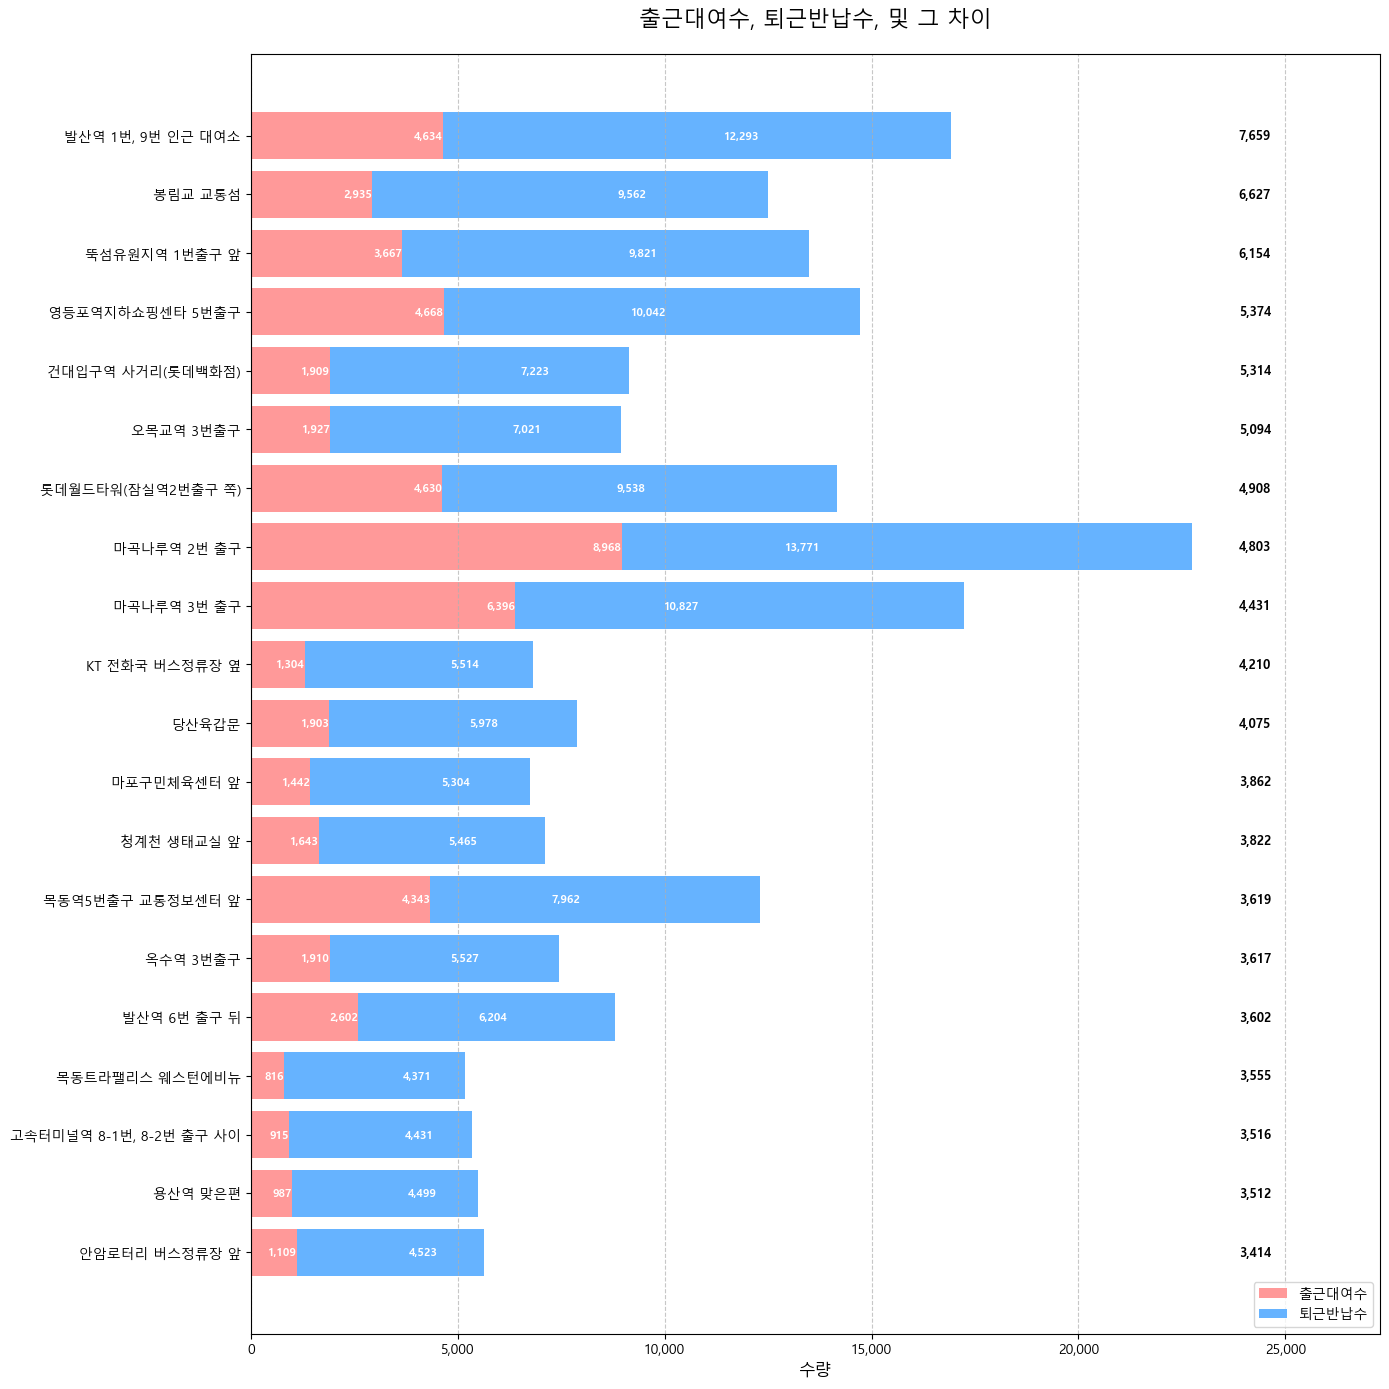

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 한글 폰트 설정 (Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 그래프 생성 (가로 세로 비율 조정)
fig, ax = plt.subplots(figsize=(14, 14))  # 가로 길이를 늘림

# 데이터 정렬 및 차이 계산
top_20_sorted = top_20.sort_values('퇴근반납수-출근대여수', ascending=True)
top_20_sorted['차이'] = top_20_sorted['퇴근반납수'] - top_20_sorted['출근대여수']

# 색상 설정
colors = ['#ff9999', '#66b3ff']

# 막대 그리기
ax.barh(top_20_sorted['대여소명'], top_20_sorted['출근대여수'], label='출근대여수', color=colors[0])
ax.barh(top_20_sorted['대여소명'], top_20_sorted['퇴근반납수'], left=top_20_sorted['출근대여수'], label='퇴근반납수', color=colors[1])

# 그래프 스타일링
ax.set_xlabel('수량', fontsize=12)
ax.set_title('출근대여수, 퇴근반납수, 및 그 차이', fontsize=16, pad=20)
ax.legend(loc='lower right', fontsize=10)

# y축 레이블 정렬
plt.yticks(rotation=0, ha='right')

# x축에 천 단위 구분자 추가
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# 그리드 추가
ax.grid(axis='x', linestyle='--', alpha=0.7)

# 각 막대에 값 표시
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width):,}',
                ha='right', va='center', fontweight='bold', fontsize=8, color='white')

bars1 = ax.barh(top_20_sorted['대여소명'], top_20_sorted['출근대여수'], color=colors[0])
bars2 = ax.barh(top_20_sorted['대여소명'], top_20_sorted['퇴근반납수'], left=top_20_sorted['출근대여수'], color=colors[1])

add_value_labels(bars1)
add_value_labels(bars2)

# 차이 값 표시 (가장 오른쪽에)
max_value = top_20_sorted[['출근대여수', '퇴근반납수']].sum(axis=1).max()
for i, value in enumerate(top_20_sorted['차이']):
    ax.text(max_value * 1.05, i, f'{int(value):,}', 
            va='center', ha='left', fontweight='bold', fontsize=9)

# x축 범위 조정
ax.set_xlim(0, max_value * 1.2)

plt.tight_layout()
plt.show()